(1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012)
[-0.33256462024230415, -0.3256189549569005, -0.3106167128142101, -0.29945576991156037, -0.28278354073471507, -0.26235318260805224, -0.21718867119813318, -0.1432395886914777, -0.027180508005354903, 0.14760008819317874, 0.3183676973221012, 0.48809390911775435, 0.5795044747719784, 0.6674353797576958]
 y = 0.0455434471482471 * x +-91.45163650761003


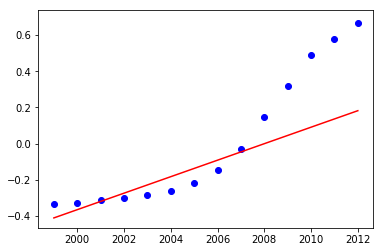

In [21]:
import re
import requests
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

url = 'https://www.internetlivestats.com/google-search-statistics/'

data = requests.get(url).content

data = data.decode('utf-8')

start = re.search("'Year', 'Search queries'",data).end()

end = re.search(" var options = { title: 'Google Searches per Year",data).start()

#print(start,end)

raw_data = data[start+4:end-5]
d=[]
for i in raw_data.split('], '):
	yr,no = i.lstrip('[').split(',')
	yr = int(yr.strip("'"))
	no = int(no)
	d.append([yr,no])

regr = linear_model.LinearRegression()
x,y = zip(*d)

max_x = max(x)
min_x = min(x)
mean_y = sum(y)/len(y)
range_y = max(y)-min(y)
y=[(i-mean_y)/range_y for i in y]
print(x)
print(y)
train_data_X = list(map(lambda x: [x], list(x[:-4])))
train_data_Y = list(y[:-4])
test_data_X = list(map(lambda x: [x], list(x[-4:])))
test_data_Y = list(y[-4:])
regr.fit(train_data_X,train_data_Y)
m=regr.coef_[0]
b=regr.intercept_

print(' y = {0} * x +{1}'.format(m,b))

%matplotlib inline
plt.scatter(x,y, color='blue')
plt.plot(x,[m*i+b for i in x],'r')
plt.show()


In [9]:
print(regr.predict(test_data_X))

[ 0.04514881  0.09069226  0.13623571  0.18177915]


In [10]:
print("Mean squared error: %.2f" % np.mean((regr.predict(test_data_X) - test_data_Y) ** 2))

Mean squared error: 0.17


In [24]:
print(regr.predict(2017)*mean_y)

[  1.65867961e+11]
